In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv', index_col = "PassengerId")

# Context

### Hypotheses that can be applied for a given dataset:
- Men survive more often than women because they are physically stronger
- Most survivors from first class
- Most of the survivors are under the age of 40
- If you pay more, your probability of survival is more
- There are dependence between cabin and survival
- People without families survive more often because they don't have to save anyone


# Data quality assessment

#### Number of raws and columns:

In [134]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in DataFrame.")

There are 100000 rows and 11 columns in DataFrame.


#### Number of NaN values in each column:

In [135]:
print(df.isna().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64


#### The missing numerical characteristics are dropped

In [136]:
df = df.dropna() 

#### For convenience, we will: 
- Cast "Age" and "Fare" to type int
- Left only the first letter of "Cabin"
- Set the column "who", which will show children

In [137]:
df["Age"] = df.Age.astype(int)

df["Fare"] = df.Fare.astype(int)

df["Cabin"] = df["Cabin"].apply(lambda s: s[0])

df['who'] = df.Sex
lst = df['who'].to_list()
ages = df['Age'].to_list()
for i in range(df.shape[0]):
    if ages[i] <= 18:
        lst[i] = "child"
df['who'] = lst

# Data exploration

In [138]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000
mean,0.608400,1.240148,44.580519,0.482012,0.559179,90.435478
std,0.488116,0.559800,15.214307,0.806512,1.045130,98.506108
min,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,35.000000,0.000000,0.000000,27.000000
50%,1.000000,1.000000,47.000000,0.000000,0.000000,62.000000
75%,1.000000,1.000000,56.000000,1.000000,1.000000,112.000000
max,1.000000,3.000000,85.000000,8.000000,9.000000,744.000000


  ####   As we can see:
 - For example, the max fare is 744 $
 - The max age is 85 
 - The mean age is 44.6 

<AxesSubplot:>

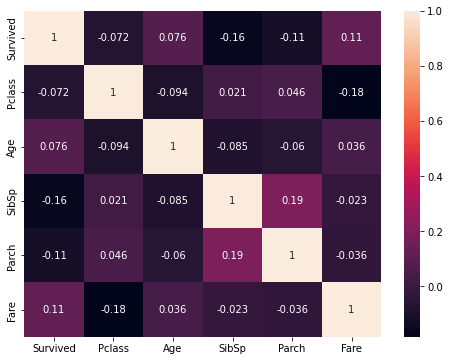

In [139]:
#Correlation between features:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot = True)

  ####   Conclussions:
 - Higher fares imply better Pclass
 - Better the Pclass, higher the chance of survival
 - Smaller the family, higher the chance of survival

##   1. Age statistics

In [140]:
df.Age.describe()

count    30881.000000
mean        44.580519
std         15.214307
min          0.000000
25%         35.000000
50%         47.000000
75%         56.000000
max         85.000000
Name: Age, dtype: float64

###   1.1  Average age groupped by different columns.

In [141]:
print("Average of age separated by Sex: ")
print(df.groupby('Sex')["Age"].mean())
print("\nAverage of age separated by Pclass: ")
print(df.groupby('Pclass')["Age"].mean())
print("\nAverage of age separated by Pclass and Sex: ")
print(df.groupby(['Pclass', 'Sex'])["Age"].mean())


Average of age separated by Sex: 
Sex
female    46.605823
male      41.949524
Name: Age, dtype: float64

Average of age separated by Pclass: 
Pclass
1    45.142588
2    43.422644
3    39.425532
Name: Age, dtype: float64

Average of age separated by Pclass and Sex: 
Pclass  Sex   
1       female    47.221015
        male      42.459596
2       female    44.509251
        male      41.188406
3       female    41.623472
        male      37.931006
Name: Age, dtype: float64


#### Conclusions:
- Women in average older than men
- Most of young people are in the third Pclass


###   1.2  Passanger age distribution.

Text(0.5, 1.0, 'Passenger age distribution')

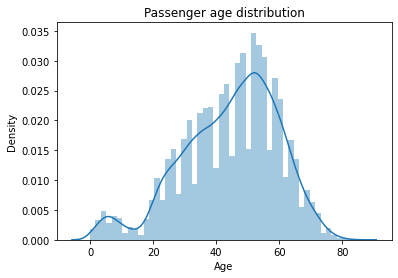

In [142]:
sns.distplot(df.Age)
plt.title("Passenger age distribution")

### 1.3  Passenger age distribution for each Pclass

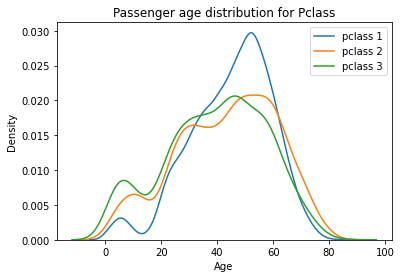

In [143]:
plt.title("Passenger age distribution for Pclass")
sns.kdeplot(df[df.Pclass == 1].Age, label = "pclass 1")
sns.kdeplot(df[df.Pclass == 2].Age, label = "pclass 2")
sns.kdeplot(df[df.Pclass == 3].Age, label = "pclass 3")
plt.legend()

### 1.4  Passenger survival rate for each Age

Text(0.5, 1.0, 'Survival rate for Age:')

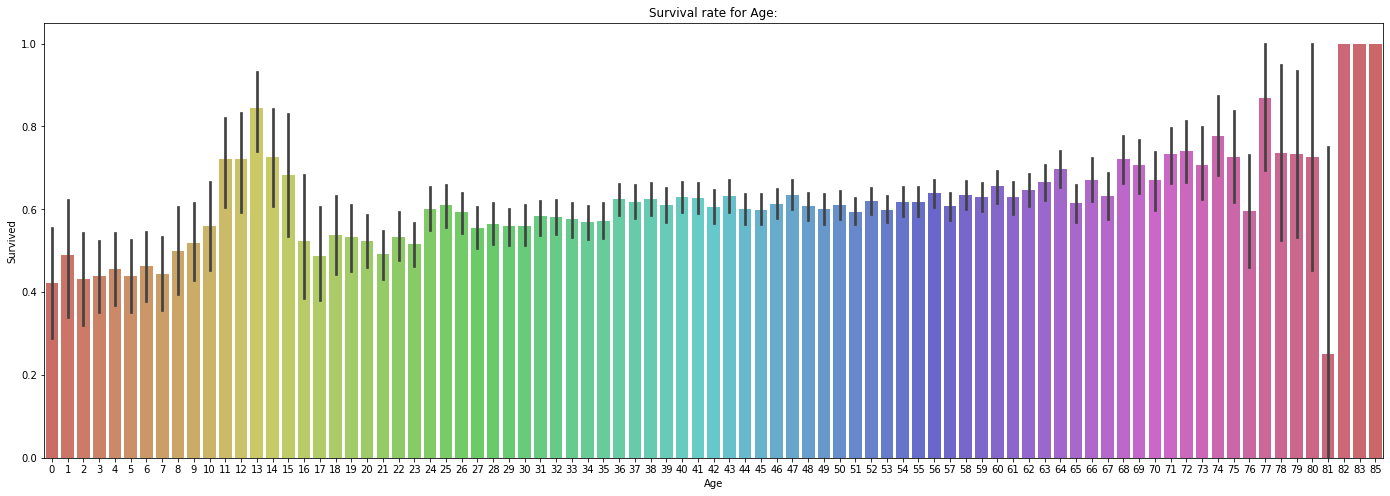

In [57]:
plt.figure(figsize = (24, 8))
sns.barplot(x = df.Age, y = df.Survived, palette = "hls")
plt.title("Survival rate for Age:")

### 1.5 Dependence between age and fare. Groupped by survived or not.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

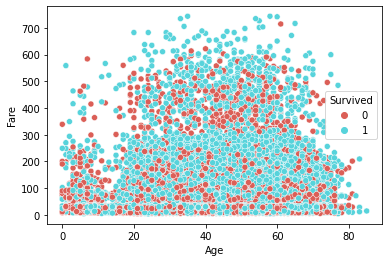

In [146]:
sns.scatterplot(x = df["Age"], y = df["Fare"], hue = df["Survived"], palette = "hls")

#### Conclusions from plots:
- There were almost no deaths among people whose ticket price was 600-700
- The young survived as well as the old
- Most people in Pclass 1 are people aged 40-60 years

## 2. Gender statistics

### 2.1  Gender groupped by different columns.

In [59]:
print("Number of men and women: ")
print(df.Sex.value_counts())
print("\nAverage fare for men and women:")
print(df.groupby('Sex')["Fare"].mean())
print("\nNumber of Parch for men and women:")
print(df.groupby('Sex')["Parch"].sum())
print("\nNumber of SibSp for men and women:")
print(df.groupby('Sex')["SibSp"].sum())

Number of men and women: 
female    17449
male      13432
Name: Sex, dtype: int64

Average fare for men and women:
Sex
female    97.730873
male      80.958309
Name: Fare, dtype: float64

Number of Parch for men and women:
Sex
female    8979
male      8289
Name: Parch, dtype: int64

Number of SibSp for men and women:
Sex
female    7063
male      7822
Name: SibSp, dtype: int64


#### Conclusions:
- There were more women than men on the ship
- Average fare for women is more
- Men have more SibSp

### 2.2  Percentage of survivors for gender.

Text(0.5, 1.0, 'Percentage of survivors for each gender')

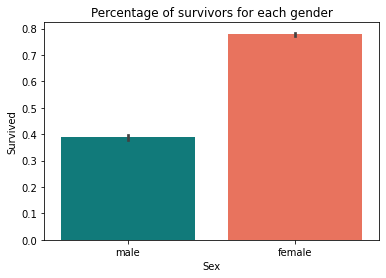

In [148]:
sns.barplot(x = df.Sex, y = df.Survived, palette = ["darkcyan", "tomato"])
plt.title("Percentage of survivors for each gender")

### 2.3  Dependence between Pclass and gender

Text(0.5, 1.0, 'Dependence between Pclass and gender')

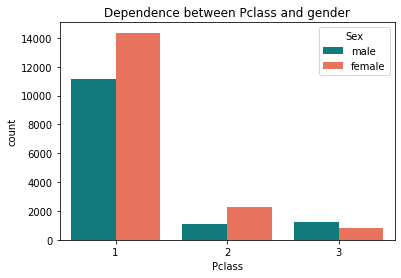

In [149]:
sns.countplot(x = df.Pclass, hue = df.Sex, palette = ["darkcyan", "tomato"])
plt.title("Dependence between Pclass and gender")

#### Conclusions from plots:
- Only 40% of the men survived
- Еhere are fewer women in the worst class

## 3. Pclass statistics

### 3.1  Pclass groupped by different columns.

In [151]:
print("Average fare for each Pclass:")
print(df.groupby('Pclass')["Fare"].mean())

Average fare for each Pclass:
Pclass
1    99.497489
2    46.309129
3    49.825829
Name: Fare, dtype: float64


#### The average price for Pclass 3 is higher, which is strange.

### 3.2  Count of people in each Pclass.


<AxesSubplot:xlabel='Pclass', ylabel='count'>

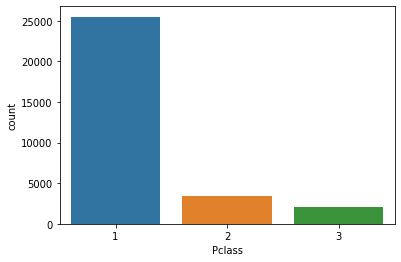

In [152]:
sns.countplot(x = df.Pclass)

### 3.3  Survival rate for each Pclass.

Text(0.5, 1.0, 'Percentage of survivors for each Pclass')

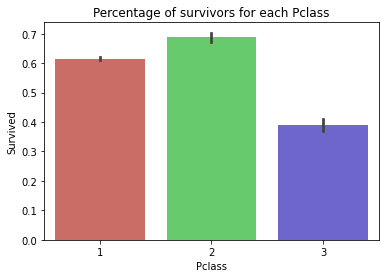

In [153]:
sns.barplot(x = df.Pclass, y = df.Survived, palette = "hls")
plt.title("Percentage of survivors for each Pclass")

### 3.4  Dependence between Pclass, survival and embarked town

Text(0.5, 1.0, 'Dependence between Pclass, survival and embarked town')

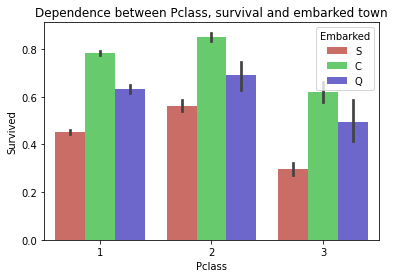

In [154]:
sns.barplot(x = df["Pclass"], y = df["Survived"], hue = df["Embarked"], palette = "hls")
plt.title("Dependence between Pclass, survival and embarked town")

### 3.5  Count of children, women and men in each Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

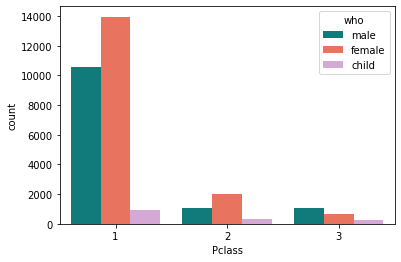

In [155]:
sns.countplot(x = df.Pclass, hue = df.who, palette = ["darkcyan", "tomato", "plum"])

### 3.6 Count of children, women and men in each Pclass divided by survival

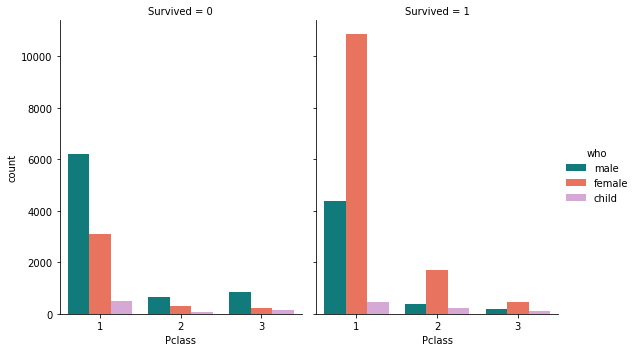

In [109]:
sns.catplot(x = "Pclass", hue = "who", col = "Survived", data = df, kind = "count", height = 5, aspect = .8, palette = ["darkcyan", "tomato", "plum"])

#### Conclusions from plots:
- Most people travel first class
- Highest survival rate in second class. This may be due to the fact that there are more young people there than in class 1
- Most of the dead children from the 3rd class
- Least of all dead men from class 2
- There are more men than women in the worst class


## 4. Fare & Cabin & Embarked town statistics

### 4.1 Mean fare for each cabin


<AxesSubplot:xlabel='Cabin', ylabel='Fare'>

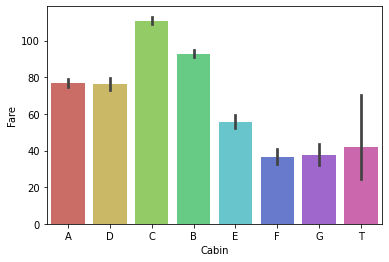

In [164]:
sns.barplot(x = df.Cabin, y = df.Fare, palette = "hls")

### 4.2  Percentage of survivors for each cabin

Text(0.5, 1.0, 'Percentage of survivors for each cabin')

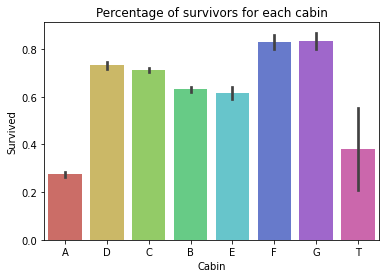

In [67]:
sns.barplot(x = df.Cabin, y = df.Survived, palette='hls')
plt.title("Percentage of survivors for each cabin")

### 4.3 Count of cabins for Pclass

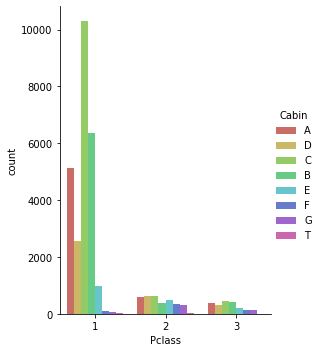

In [173]:
sns.catplot(x = "Pclass", hue = "Cabin", data = df, kind = "count", height = 5, aspect = .8, palette = "hls")

### 4.4  Percentage of survivors for each embarked town

Text(0.5, 1.0, 'Percentage of survivors for each embarked town')

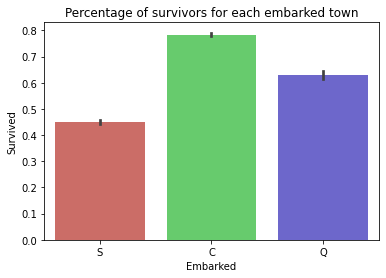

In [66]:
sns.barplot(x = df.Embarked, y = df.Survived, palette='hls')
plt.title("Percentage of survivors for each embarked town")

#### Conclusions from plots:
- The most expensive cabin is cabin "C"
- Highest survival rate in "F" and "G" cabins
- Most of the survivors are from Cherbourg

## Parch & SibSp statistics

<AxesSubplot:xlabel='family_size', ylabel='Survived'>

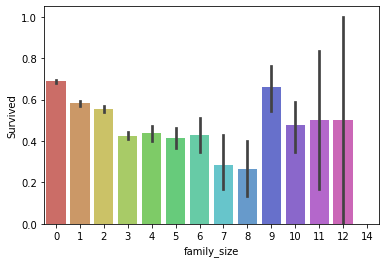

In [115]:
df["family_size"] = df.Parch + df.SibSp
sns.barplot(x = df.family_size, y = df.Survived, palette = "hls")

# Summary

## Our hypotheses are as follows:
- The Titanic disaster is an exception to the rule, as more women survived here. Because the evacuation was led by the captain
- Highest survival rate in second class. This may be due to the fact that there are more young people there than in class 1
- "Most of the survivors are under the age of 40" - it's false, cause the young survived as well as the old
- "If you pay more, your probability of survival is more" - not always like this, cause high survival rate in relatively inexpensive cabins
- There are dependence between cabin and survival
- People without families survive 70% of the time